# Question 1A

## Import Packages

In [40]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torchvision import transforms
from torch.utils.data import Dataset
import torchvision.models as models
import torch.nn as nn
import torch
import time
import random
import os
import matplotlib.pyplot as plt
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

## Specify Transforms

In [41]:
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(scale=(0.6, 1.0), size=(112,112)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

valid_transforms = transforms.Compose([
    transforms.Resize(size=(112,112)),
    transforms.ToTensor()
])

## Load in Dataset

Code is initally loaded using the ImageFolder Class, which replaces the dataset class. This class requires the root folder (In this case the seg_train folder) and creates classes based on the name of the folder. The transforms can also be applied here. Current transforms are from lab 4.

In [42]:
train_dataset = ImageFolder(root='datasets/Intel_Classification_Dataset/seg_train',transform=train_transforms)
print("Train: {} examples".format(len(train_dataset)))

valid_dataset = ImageFolder(root='datasets/Intel_Classification_Dataset/seg_test',transform=valid_transforms)
print("Validation: {} examples".format(len(valid_dataset)))

Train: 14034 examples
Validation: 3000 examples


Once passed into the class, the dataset can be passed using the dataloader class like previous. Current batch size is from lab 4

In [43]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
valid_loader = torch.utils.data.DataLoader(dataset=valid_dataset, batch_size=len(valid_dataset), shuffle=True)
print("Train: {} batches".format(len(train_loader)))
print("Valid: {} batches".format(len(valid_loader))) 

Train: 220 batches
Valid: 1 batches


## Show 10 random Images to verify labels

Code gets the class names randomly picks 10 images to display.

### Training Dataset

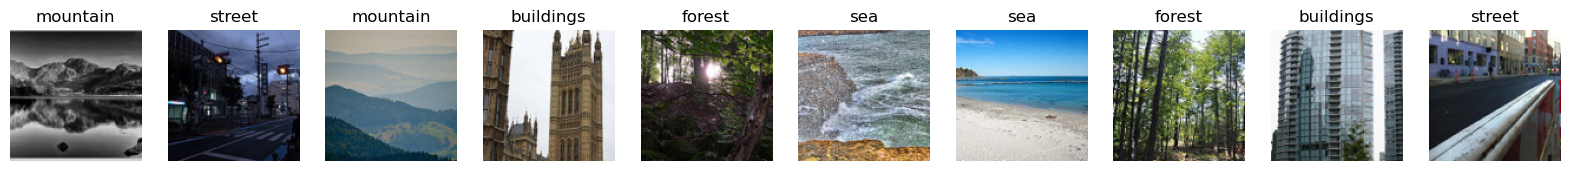

In [44]:
# Get the class names
class_names = train_dataset.classes

# Shuffle the indices of the dataset
indices = list(range(len(train_dataset)))
random.shuffle(indices)

# Define the number of images to show
num_images = 10

# Create a figure and axis objects using matplotlib
fig, axs = plt.subplots(1, num_images, figsize=(20, 20))

# Loop over the random indices and plot the images
for i in range(num_images):
    index = indices[i]
    img, label = train_dataset[index]
    img = img.permute(1, 2, 0)
    axs[i].imshow(img)
    axs[i].set_title(class_names[label])
    axs[i].axis("off")

# Show the plot
plt.show()


### Validation Dataset

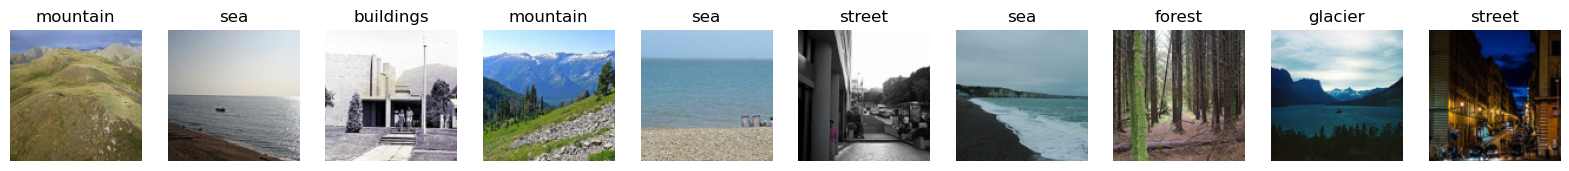

In [45]:
# Get the class names
class_names = valid_dataset.classes

# Shuffle the indices of the dataset
indices = list(range(len(valid_dataset)))
random.shuffle(indices)

# Define the number of images to show
num_images = 10

# Create a figure and axis objects using matplotlib
fig, axs = plt.subplots(1, num_images, figsize=(20, 20))

# Loop over the random indices and plot the images
for i in range(num_images):
    index = indices[i]
    img, label = valid_dataset[index]
    img = img.permute(1, 2, 0)
    axs[i].imshow(img)
    axs[i].set_title(class_names[label])
    axs[i].axis("off")

# Show the plot
plt.show()


### Load ResNet-50 as the base model

In [46]:
# Load pre-trained ResNet-50 model
model = models.resnet50(pretrained=True)

c:\Users\Ben\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Ben\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


### Change the last layer to only have 6 classes

In [47]:
# Freeze the first 6 layers of ResNet
child_index = 0
for child in model.children():
    child_index += 1
    if child_index < 7:
        for param in child.parameters():
            param.requires_grad = False

# Change the last layer to classify into 6 classes
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 6)

### Define loss function and optimiser

In [48]:
loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

### Train the model

Device: cuda
Epoch [1/10], Loss: 0.4722, Accuracy: 84.05%
74.55 seconds
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


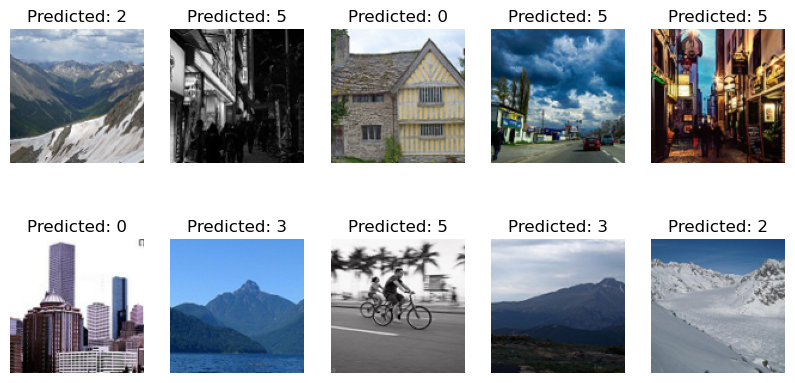

Epoch [2/10], Loss: 0.2334, Accuracy: 91.82%
76.09 seconds
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


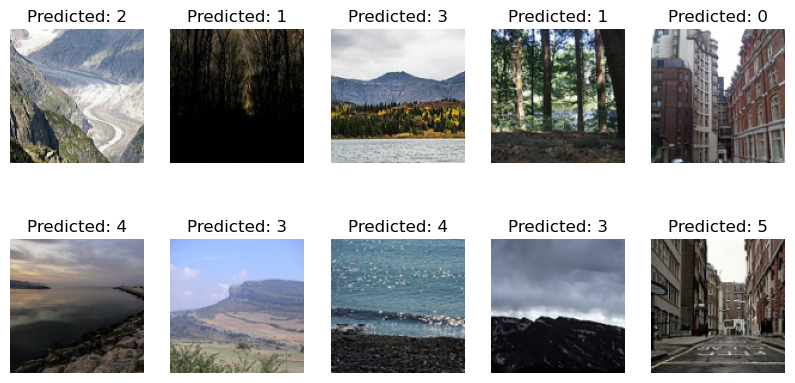

Epoch [3/10], Loss: 0.1896, Accuracy: 93.09%
76.66 seconds
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


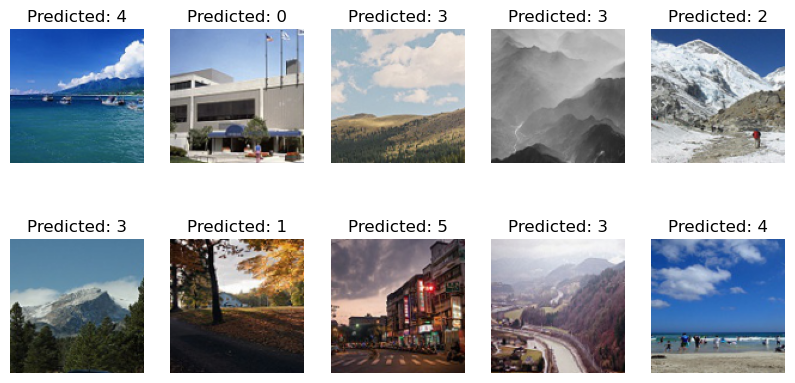

Epoch [4/10], Loss: 0.1668, Accuracy: 94.03%
73.12 seconds
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


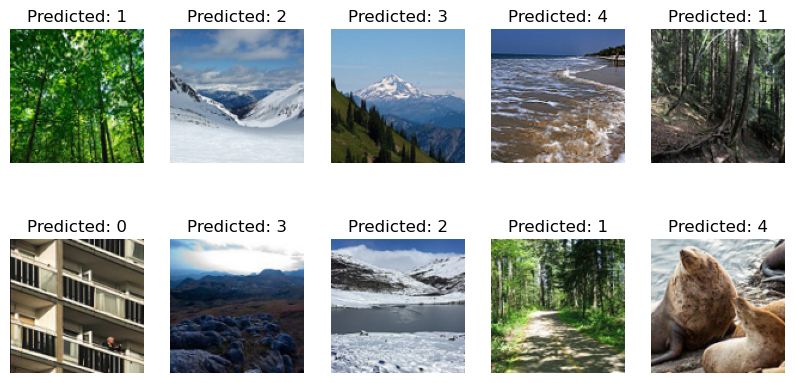

Epoch [5/10], Loss: 0.1440, Accuracy: 94.81%
72.98 seconds
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


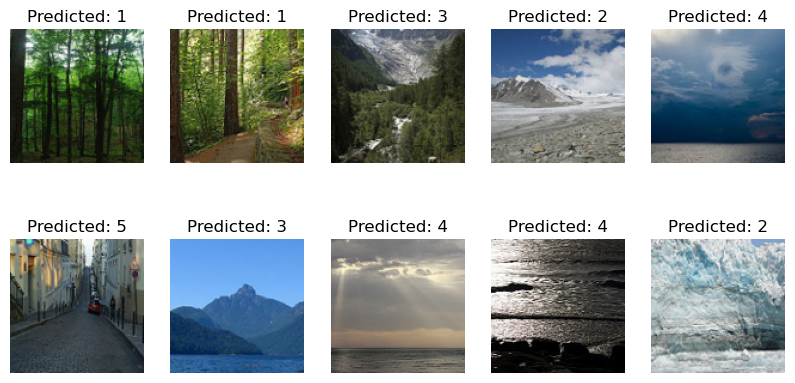

Epoch [6/10], Loss: 0.1277, Accuracy: 95.37%
72.84 seconds
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


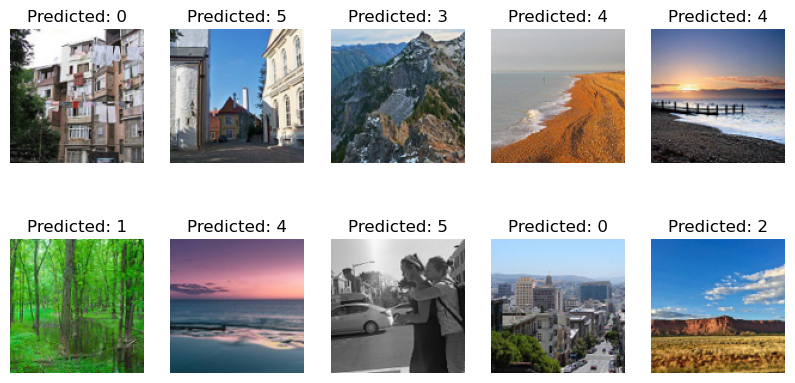

Epoch [7/10], Loss: 0.1055, Accuracy: 96.32%
73.26 seconds
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


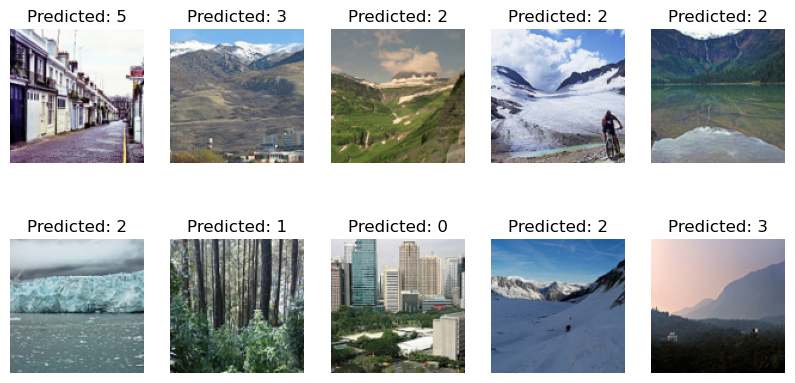

Epoch [8/10], Loss: 0.0937, Accuracy: 96.59%
72.72 seconds
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


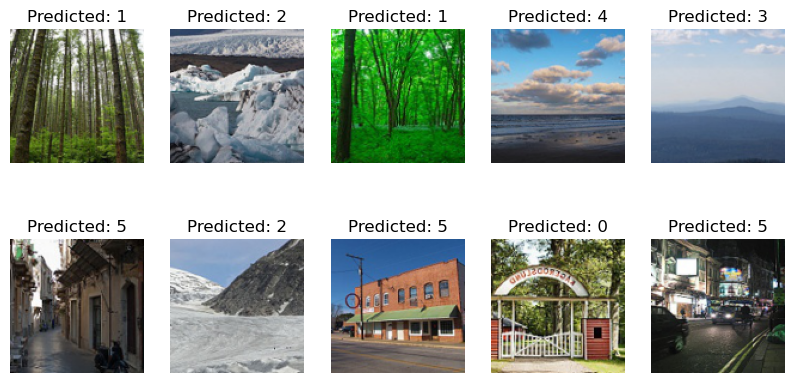

Epoch [9/10], Loss: 0.0834, Accuracy: 97.00%
72.34 seconds
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


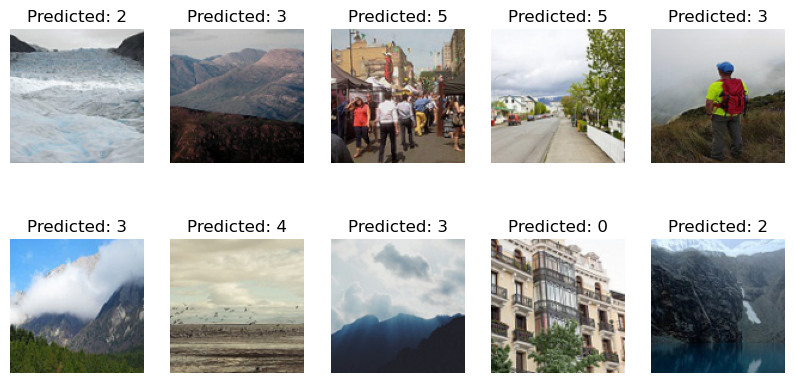

Epoch [10/10], Loss: 0.0737, Accuracy: 97.43%
73.16 seconds
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


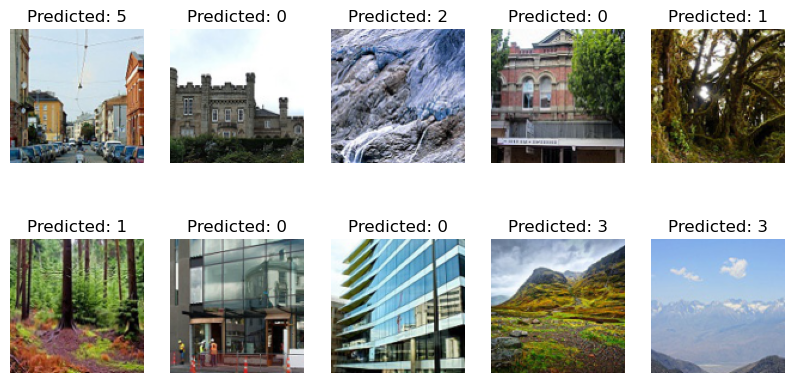

Total time taken:	737.72 seconds


In [49]:
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))
model.to(device)

NUM_EPOCHS = 10
total_time = 0.0
train_losses, train_accs = [], []

for epoch in range(NUM_EPOCHS):
    model.train()
    avg_acc = 0.0
    epoch_losses = 0.0
    t0=time.time()

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimiser.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        accuracy = ((outputs.argmax(dim=1) == labels).float().mean())

        # Backward pass and optimisation
        loss.backward()
        optimiser.step()

        epoch_losses += loss.item()

        avg_acc += accuracy/len(train_loader)
    
    # Print average loss
    avg_loss = epoch_losses/len(train_loader)
    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Loss: {avg_loss:.4f}, Accuracy: {avg_acc*100:.2f}%")
    print('{:.2f} seconds'.format(time.time() - t0))
    total_time += time.time() - t0

    train_losses.append(avg_loss)
    train_accs.append(avg_acc.item())

       ### Prediction
    print(train_dataset.classes)
    # Switch model to evaluation mode
    model.eval()
    # Get 10 random images from the training set
    indices = torch.randint(0, len(train_dataset), (10,)).tolist()
    data = [train_dataset[i] for i in indices]
    images = torch.stack([d[0] for d in data]).to(device)
    labels = torch.tensor([d[1] for d in data]).to(device)

    # Predict the labels for the images
    with torch.no_grad():
        outputs = model(images)
    predicted = torch.argmax(outputs, dim=1)

    # Display the images with their predictions
    fig, axs = plt.subplots(2, 5, figsize=(10, 5))
    for i in range(2):
        for j in range(5):
            index = i * 5 + j
            axs[i, j].imshow(images[index].cpu().permute(1, 2, 0))
            axs[i, j].set_title('Predicted: {}'.format(predicted[index]))
            axs[i, j].axis('off')
    plt.show()

print("Total time taken:\t{:.2f} seconds".format(total_time))

### Compute validation accuracy and loss

In [51]:
test_accuracy, test_loss = 0, 0
with torch.no_grad():
    # Iterate through batches
    model.to("cpu")
    for data, label in valid_loader:
        # Forward pass
        test_output_i = model(data)
        test_loss_i = loss_fn(test_output_i, label)
        # Compute metrics
        acc = ((test_output_i.argmax(dim=1) == label).float().mean())
        test_accuracy += acc/len(valid_loader)
        test_loss += test_loss_i/len(valid_loader)

print("Validation loss: {:.4f}".format(test_loss))
print("Validation accuracy: {:.2f}%".format(test_accuracy*100))

Validation loss: 0.2111
Validation accuracy: 93.30%


### Make prediction on the validation set

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


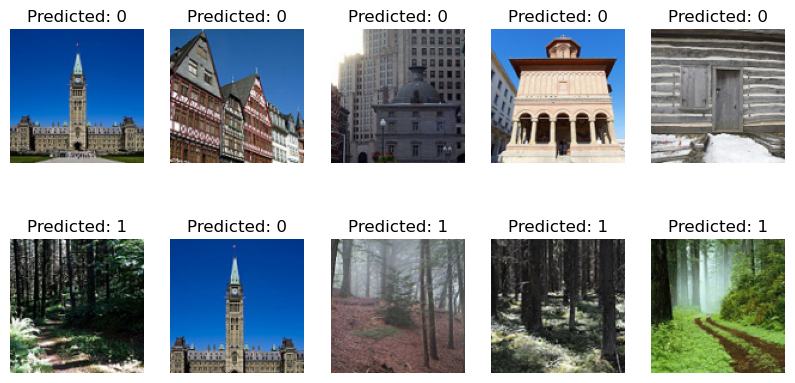

In [52]:
 ### Prediction
print(valid_dataset.classes)
# Switch model to evaluation mode
model.eval()
# Get 10 random images from the training set
indices = torch.randint(0, len(valid_dataset), (10,)).tolist()
data = [train_dataset[i] for i in indices]
images = torch.stack([d[0] for d in data])
labels = torch.tensor([d[1] for d in data])

# Predict the labels for the images
with torch.no_grad():
    outputs = model(images)
predicted = torch.argmax(outputs, dim=1)

fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for i in range(2):
    for j in range(5):
        index = i * 5 + j
        axs[i, j].imshow(images[index].permute(1, 2, 0))
        axs[i, j].set_title('Predicted: {}'.format(predicted[index]))
        axs[i, j].axis('off')
plt.show()

### Save the model weights into a separate file

In [53]:
torch.save(model.state_dict(),'model2_weights(LabModel).pth')

### Display training accuracy and loss evolution

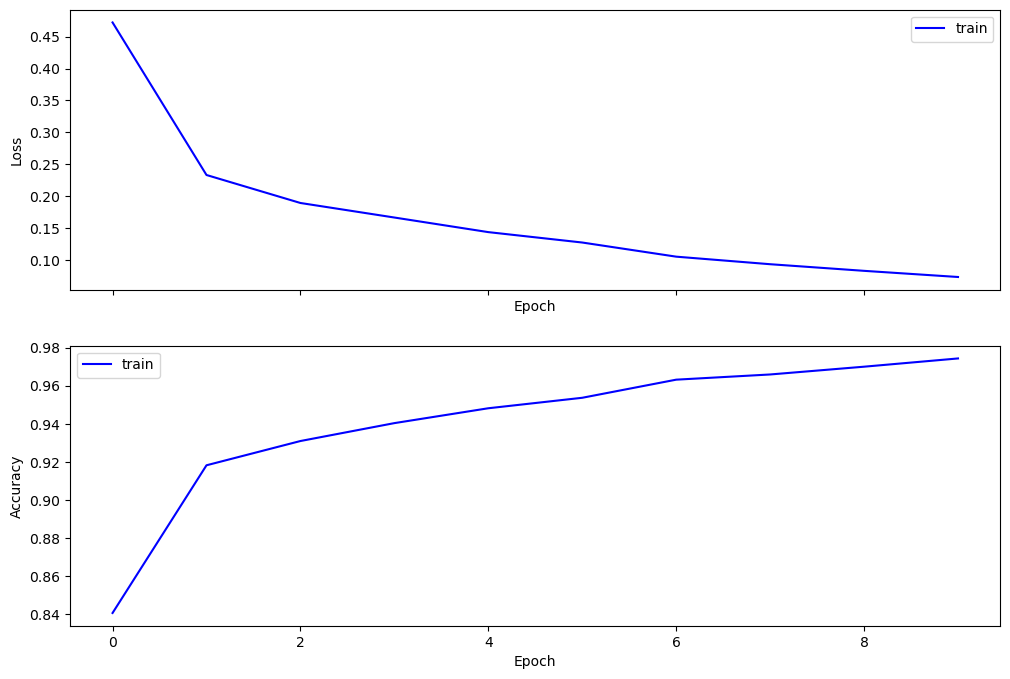

In [54]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 8), sharex=True)
ax1.plot(train_losses, color='b', label='train')
ax1.set_ylabel("Loss")
ax1.set_xlabel("Epoch")
ax1.legend()
ax2.plot(train_accs, color='b', label='train')
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("Epoch")
ax2.legend()